## Quadtree

**Quadtree** *(или квадродерево)* — дерево, каждая внутренняя вершина которого содержит 4 ребёнка. Каждой вершине  квадродерева соответствует некоторый квадрат. Если внутренней вершине $v$ соответствует какой-то квадрат $a$, то её детям этой вершины соответствуют четверти квадрата $a$. В нашем случае в листах будут храниться координаты точки на плоскости. 

Пусть дано множество точек $P$, для которого нужно построить квадродерево. Начнём с некоторого квадрата $\sigma$, содержащего все точки из $P$ (eсли он не дан явно, его можно легко найти за линейное время от числа вершин). Пусть $\sigma = \left(x_0, x_1\right] \times \left(y_0, y_1\right]$. Обозначим $x_m = \left(x_0 + x_1 \right) / 2$; $y_m = \left(y_0 + y_1\right) / 2$. Тогда:

* если $P$ не содержит точек, то корнем квадродерева будет лист, в котором в качестве координат точки будет храниться `None`;
* если $P$ содержит 1 точку то корнем квадродерева будет лист, в котором хранятся координаты единственной точки из $P$;
* иначе корнем дерева будет вершина $v$, которой соответствует квадрат $\sigma$, а её детям $v_{NE}$, $v_{NW}$, $v_{SW}$, $v_{SE}$ будут соответствовать квадраты $\sigma_{NE} = \left(x_m, x_1\right] \times \left(y_m, y_1\right]$, $\sigma_{NW} = \left(x_0, x_m\right] \times \left(y_m, y_1\right]$, $\sigma_{SW} = \left(x_0, x_m\right] \times \left(y_0, y_m\right]$, $\sigma_{SE} = \left(x_m, x_1\right] \times \left(y_0, y_m\right]$. Теперь таким же образом рекурсивно превращаем каждого ребёнка в квадродерево для множества точек, лежащих в соответствующих четвертях.

<img src="src/SimpleQuadtree.svg">

## Composed Quadtree

Обычное квадродерево может иметь слишком большую глубину независимо от количества точек. Сжатое дерево лишено данного недостатка и имеет глубину $O(n)$

Назовём квадрат **интересным**, если соответствующая ему вершина дерева имеет хотя бы два непустых ребёнка (то есть таких, что в их квадратах содержится хотя бы одна точка) или является корнем. Понятно, что любой квадрат, содержащий хотя бы две точки, содержит в себе хотя бы один интересный квадрат. Поправка на то, что корневой  квадрат является интересным не обязательна, но на практике обычно удобнее, чтобы дерево содержало хотя бы один интересный квадрат.

Сжатое квадродерево получается сжатием обычного таким образом, чтобы остались только интересные квадраты. Пустые дети неинтересных квадратов удаляются. Для каждого интересного квадрата $p$ будем хранить четыре указателя для каждой четверти этого квадрата. Если четверть содержит две или более точки, то указатель ссылается на наибольший интересный квадрат в этой четверти. Если четверть содержит одну точку, то указатель ссылается на эту точку. Наконец, если четверть не содержит точек, то указатель сделаем нулевым.

<img src="src/SimpleToComposed.svg"/>

**Лемма (о высоте сжатого квадродерева) :**
> Сжатое квадродерево для $n$ точек имеет $O(n)$ вершин и глубину $O(n)$.

$\triangleright$
<div style="padding-left:40px">
Покажем оценку $O(n)$ для числа интересных квадратов. Для этого докажем по индукции, что в квадродереве для $n$ точек количество интересных квадратов меньше либо равно $n$:

* для $n = 1$ это очевидно;
* пусть доказано для квадродерева с $n - 1$ точек. Добавим новую точку $x$: сначала найдём наименьший интересный квадрат $p$, который её содержит. Если $x$ находится в пустой четверти квадрата $p$, то просто добавляем $x$ как лист, не изменив число интересных квадратов. Если же четверть квадрата $p$ в которую необходимо вставить $x$, уже содержит точку $y$, то мы можем добавить в дерево интересный квадрат, который будет содержать $x$ и $y$ в разных четвертях. Таким образом, добавление точки увеличивает количество интересных квадратов не более, чем на один.


Таким образом, квадродерево для $n$ точек имеет $O(n)$ вершин. Глубина, очевидно, тоже $O(n)$, поскольку на каждом уровне есть хотя бы одна вершина.
</div>
$\triangleleft$

### Операции над Composed Quadtree

**Локализация**: Под локализацией подразумевается поиск наименьшего интересного квадрата, где геометрически находится интересующая точка. Это делается просто: начиная с корня, спускаемся вниз по дереву, переходя в те четверти, где геометрически лежит искомая точка.

Работает за высоту дерева, то есть, за $O(n)$.

**Вставка**: Сначала локализуемся, находим наименьший квадрат, в который надо вставить точку, понимаем, в какую четверть будем вставляться. Рассмотрим эту четверть:

* Если четверть пустая, то просто запоминаем координаты вершины в этом листе.
* Если там есть точка (или интересный квадрат), то заменяем этот лист на новый интересный квадрат, который в четвертях содержит эти точки (или точку и интересный квадрат). Нам этом шаге самое главное — правильно вычислить рамки нового квадрата.

**Удаление**: Сначала локализуемся, находим наименьший интересный квадрат, в котором может лежать искомая точка. Если в одной из четвертей хранится указатель на координаты нашей точки — удаляем её. После удаления точки наш квадрат может перестать быть интересным. При этом, родитель нашего квадрата в любом случае останется интересным. В таком случае нам надо просто заменить наш квадрат на его единственного непустого ребенка.

---

Таким образом, все операции на сжатом квадродереве выполняются за $O(n)$. Это ничем не лучше по асимптотике, чем хранить точки просто в векторе. Тем не менее, это структура нам понадобится для реализации **skip quadtree**.

### Практические задания

Для полного понимая алгоритмов вы можете пройти набор заданий. Прежде чем начать их делать, следует ознакомиться с набором сущностей, которые будут использоваться в заданиях

* Точка на плоскости, обычно называется `point` — кортеж `(x, y)`
* Квадрат на плоскости, обычно называется `bounds` — кортеж `(left, right, bottom, top)`
* Четверть квадрата, обычно называется `quarter` или `qt`. Используется, например, для хранения детей в вершине узла дерева. Реализуется перечислением `Quarter` и имеет 4 значения: `Quarter.LT`, `Quarter.LB`, `Quarter.RT` и `Quarter.RB`.
* Узел квадродерева, обычно называется `node`. Реализуется классом `Node`, имеет следующие атрибуты:
    
    * `node.data` — точка, хранящаяся в этом узле. 
    * `node.bounds` — квадрат, лежащий в этом узле.
    * `node.children` — дочерние узлы квадродерева. Хранится в виде мапы `Quarter -> Node`.
    * `node.empty()` — тест на пустоту узла. Возвращает `True`, когда узел пустой.
    * `node.simple()` — тест на простоту узла. Возвращает `False`, когда в узле хранится интересный квадрат.
    
    Узел должен находится в одном из 3 состояний. При модификации узла необходимо сохранять этот контракт:
      
      * *пустой* — не лежит ни одной точки. <br>
        `bounds == None`, `children == None`, `data == None`, `simple() == True`, `empty() == True`
      * *простой* — лежит ровно одна точка. <br>
         `bounds == None`, `children == None`, `data == (x, y)`, `simple() == True`, `empty() == False`
      * *нетривиальный* — лежит больше одной точки. В случае сжатого дерева верно то, что хотя бы два ребенка не пусты. <br>
         `bounds == (...)`, `children == {...}`, `data == None`, `simple() == False`, `empty() == False`
    
* Квадродерево, обычно называется `tree`. Имеет атрибут `tree.root` — корень дерева. В нашей реализации корень квадродерева будет считаться нетривиальным вне зависимости от того, сколько точек лежит в дереве. Это упрощает реализацию операций на дереве. Например, локализация всегда вернёт интересный квадрат (кроме того случая, когда точка геометрически не лежит в дереве).
         
Также вам могут понадобится вспомогательные функции:
    
* `contains(bounds, point)` — возвращает `True`, если `point` лежит в квадрате `bounds`.
* `quarter_by(bounds, point)` — возвращает четверть квадрата `bounds`, в которой лежит `point`.
* `quarter_bounds(bounds, quarter)` — возвращает квадрат, который является четвертью `quarter` квадрата `bounds`. 

In [1]:
import utils.view as v
import utils.solutions as s
from utils.base import *

In [2]:
def cqtree_localize(root, point):
    """Локализация: возвращает узел, содержащий минимальный интересный квадрат из root, где находится point"""
    return s.cqtree_localize(root, point) # TODO: Напиши свое решение здесь

In [3]:
def cqtree_insert(tree, point):
    """Вставка точки в квадродерево"""
    node = cqtree_localize(tree.root, point)
    if node is None:
        return
    cqtree_insertInternal(tree, point, node)
    
def cqtree_insertInternal(tree, point, node):
    """Вставка точки в узел квадродерева"""
    return s.cqtree_insertInternal(tree, point, node) # TODO: Напиши свое решение здесь

In [4]:
def cqtree_remove(tree, point):
    """Удаление точки из квадродерева"""
    node = cqtree_localize(tree.root, point)
    if node is None:
        return
    cqtree_removeInternal(tree, point, node)

def cqtree_removeInternal(tree, point, node):
    """Удаление точки из узла квадродерева"""
    return s.cqtree_removeInternal(tree, point, node) # TODO: Напиши свое решение здесь

In [5]:
def create_cqtree(bounds):
    return s.CQTree(bounds, cqtree_localize, cqtree_insertInternal, cqtree_removeInternal)

### Визуализация

Свои решения можно проверить в этой песочнице.
Если при запуске ячейки ничего не отображается, то необходимо перезапустить ячейку для правильной работы.

При нажатии левой кнопки мыши по пустому месту происходит вставка вершины. 
Если изначально вершина есть, то она будет удалена.
При нажатии правой кнопки мыши происходит локализация.

Если вы увидели, что ваш алгоритм работает не так, как ожидалось,
то вы можете использовать функции `v.display_cqtree_dump(tree, ops)` или `v.apply_operations(tree, ops)`.
Вектор `ops` содержит набор операций, где каждая операция — кортеж `(op_type, x, y)`.
Строка `op_type` может быть равна `'localize'`, `'insert'` или `'remove'`.

Это может быть полезным, т.к. не придётся повторять тест руками в песочнице.
Также у визуализации есть недостаток в том, что все исключения из кода проглатываются.

Замечу, что алгоритм визуализации не оптимален,
поэтому много повторных нажатий может привести к зависанию.

<IPython.core.display.Javascript object>


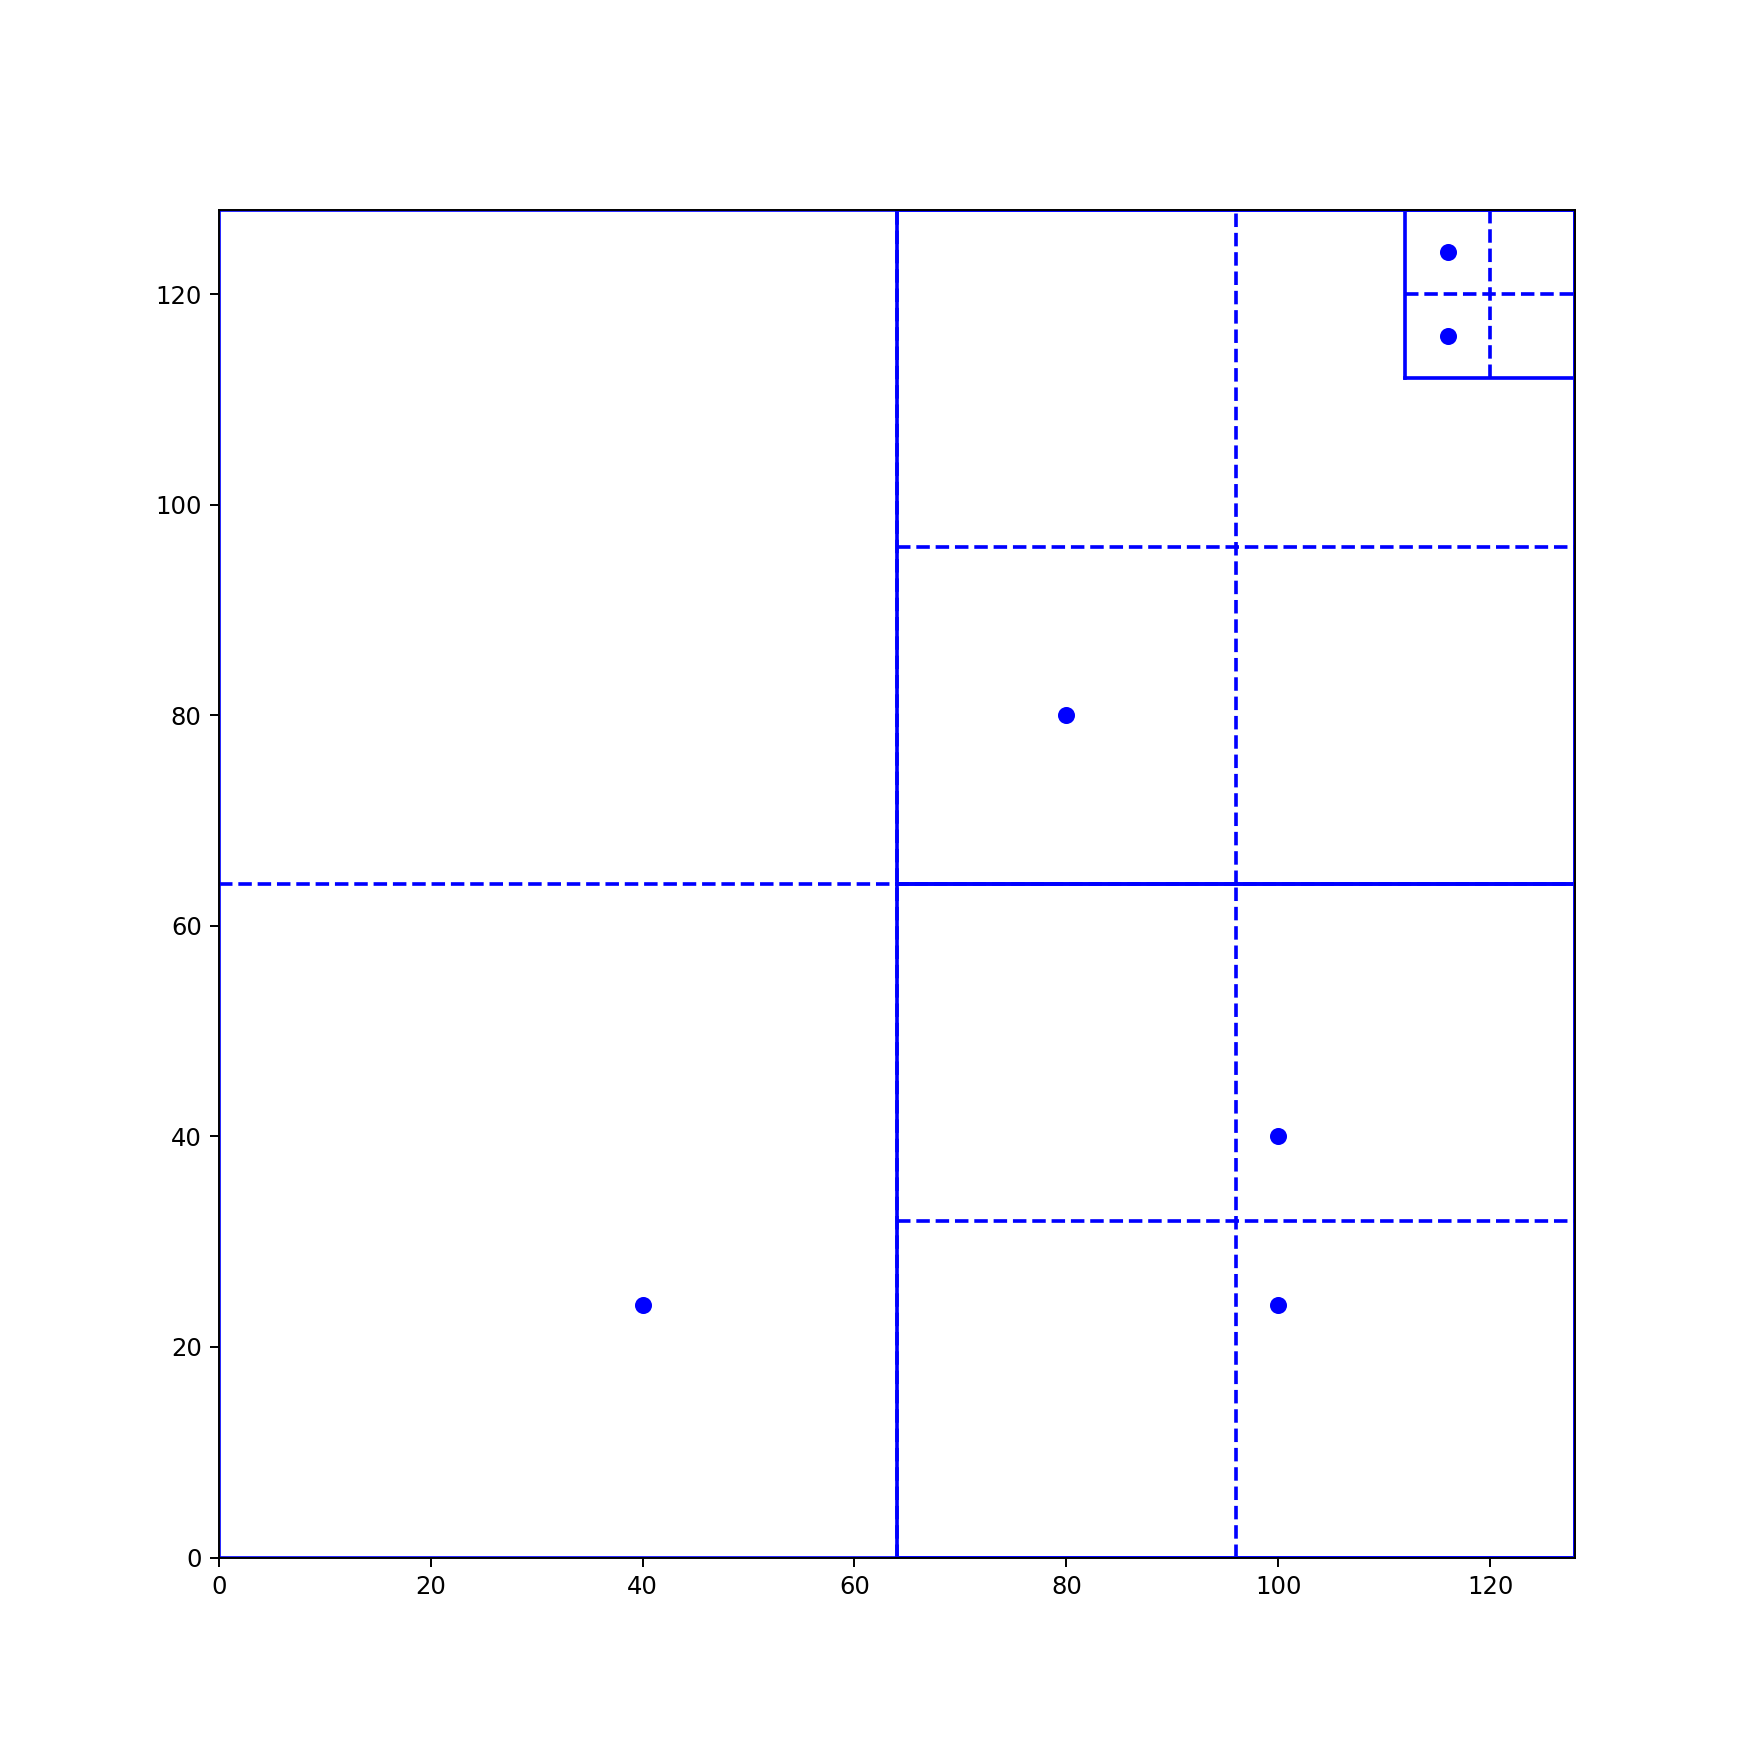

In [6]:
%matplotlib notebook

init_points = [(40, 24), (80, 80), (100, 24), (100, 40), (116, 116), (116, 124)]

cqtree = create_cqtree((0, 128, 0, 128))
v.init_tree(cqtree, init_points)
v.display_cqtree_interactive(cqtree)

### Наихудший случай

Так же как и в простой реализации бинарного дерева, у сжатого квадродерева высота в наихудшем случае линейно растет от количества точек. Это происходит, когда структура представляет из себя своеобразный "бамбук" — каждая нетривиальная вершина содержит двух детей, один из которых является простым.

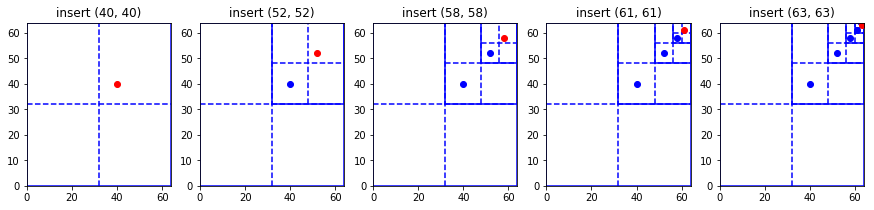

In [7]:
%matplotlib inline

worst_case_ops = [
    ('insert', 40, 40),
    ('insert', 52, 52),
    ('insert', 58, 58),
    ('insert', 61, 61),
    ('insert', 63, 63),
]
    
worst_tree = create_cqtree((0, 64, 0, 64))
v.display_cqtree_dump(worst_tree, worst_case_ops)

## Skip Quadtree

**Skip quadtree** — структура данных, основанная на идее структуры **skip list**, позволяющая хранить множество точек и быстро производить над ним операции, такие как локализация, вставка и удаление. Здесь мы рассмотрим одну из реализаций — **randomized skip quadtree**.

Построим **randomized skip quadtree** для заданного множества точек $S$:

Рассмотрим последовательность вложенных подмножеств $\{S_i\}$ множества $S$. Пусть $S_0 = S$; $S_i$ — подмножество $S_{i-1}$, причем каждый элемент из $S_{i-1}$ входит в $S_{i}$ с вероятностью $p \in \left(0, 1\right)$. **Randomized skip quadtree** для множества $S$ будет состоять из набора $\{Q_i\}$, где $Q_i$ — сжатое квадродерево над множеством $S_i$. Будем называть эти квадродеревья уровнями, при этом нулевой уровень содержит все точки из $S$.

Также мы должны уметь из вершины с одного уровня перемещаться на соответствующую ей вершину на предыдущем уровне. Это можно делать несколькими способами:
    
* Просто хранить ссылку внутри вершины.
* Каждый уровень будет хранить ассоциативный массив из масок в вершины. Маску для вершины можно однозначно задать по её координатам.

### Локализация

Локализация происходит так же как и в **quadtree**.
Сначала локализуемся в наивысшем уровне, начиная из корня дерева. Из полученной вершины переходим в соответствующую ей вершину на предыдущем уровне. Снова запускаем локализацию, но теперь не из корня, а из вершины, полученной предыдущей локализацией. Повторяем процесс пока не локализуемся на нулевом уровне.

Идеологически это похоже на **skip list**: мы пользуемся тем, что локализация в **quadtree** происходит за линейное время (чем меньше точек в квадродереве, тем быстрее проходит операция), и сначала пытаемся локализоваться на том уровне, где меньше всего точек, а потом, при необходимости, спускаемся на уровень ниже, и продолжаем операцию. Ниже показано, что локализация подобным образом имеет асимптотику $O(\log n)$.

### Вставка

1. Локализация. В процессе локализации будем для каждого уровня запоминать вершину, на которой остановилась локализация внутри этого уровня.
2. Вставка точки в нулевой слой, в вершину, полученную локализацией из п.1.
3. С вероятностью $p$, переходим на уровень выше к вершине, которую мы запомнили в п.1, вставляем точку в эту вершину.
4. В случае удачи повторяем п.3, в случае неудачи завершаем операцию.
5. Если мы хотим перейти к слою, которого нет, создаем новый слой, вставляем туда новую точку и завершаем операцию.

### Удаление

Запускаем локализацию. В процессе локализации будем удалять точку на всех уровнях, где она есть. Если на уровне стало ноль точек - удаляем уровень.

### Оценка времени работы
Такой сложный способ хранения множества точек дает нам бонус в скорости выполнения операций над этим множеством. Из лемм ниже следует то, что время выполнения локализации оценивается в $O(\log n)$. Вставка и удаление также работает за $O(\log n)$, т.к. на каждом слое происходит не более $O(1)$ операций (добавление / удаление вершины в квадродерево).

**Лемма (о существовании узла на предыдущем уровне):**
> Для любого узла на уровне $Q_i$ существует соответствующий ему узел на уровне $Q_{i-1}$.


$\triangleright$
<div style="padding-left:40px">

По построению сжатого квадродерева узлам в дереве соотвествуют интересные квадраты на плоскости.
Таким образом нам необходимо доказать то, что если на каком-то уровне квадрат является интересным, то и на предудыщем уровне он тоже интересный.

Рассмотрим узел $t$ на уровне $Q_i$ и соотвествующий ему квадрат $s$ — интересный на $Q_i$.
Из определения интересного квадрата следует то, что существует хотя бы 2 четверти квадрата $s$ — $s_1$ и $s_2$, которые не пусты на уровне $Q_i$. 
Из определения алгоритма вставки следует то, что четверти $s_1$ и $s_2$ также не пусты на уровне $Q_{i-1}$,
а следственно — квадрат $s$ также интересен на уровне $Q_{i-1}$

</div>
$\triangleleft$

**Лемма (о количестве шагов локализации на одном уровне):**
> На каждом уровне совершается $O(1)$ шагов локализации для любой точки `x`.

$\triangleright$
<div style="padding-left:40px">
Пусть в на `i`-ом уровне поиск точки `x`, начинающийся с корня, проходит по квадратам $p_0, p_1 \dots p_m$. Пусть случайная величина $j$ — количество шагов локализации внутри $Q_i$, тогда $p_{m - j}$ — последний квадрат из $p_0, p_1 \dots p_m$, являющийся интересным в $Q_{i + 1}$.

Оценим мат.ожидание случайной величины $j$. Пусть $T$ — множество встреченных на пути $p_{m - j + 1} \dots p_m$ непустых четвертинок. Чтобы $p_{m - j}$ был последним из $p_0, p_1 \dots p_m$ интересным квадратом в $Q_{i + 1}$ необходимо, чтобы среди $T$ только одна (вероятность этого назовём $\mathrm{Pr}_1$) или ноль (вероятность этого назовём $\mathrm{Pr}_0$) были непустыми в $Q_{i + 1}$. Иначе, если будет хотя бы пара непустых четвертинок, то их наименьший общий предок в дереве будет интересным квадратом и будет находиться глубже $p_{m - j}$. Таким образом, искомая вероятность не превосходит $\mathrm{Pr}_0 + \mathrm{Pr}_1$.

Пусть $|T| = t$, $q = 1 - p$.

$\mathrm{Pr}_0 = q^t$, потому что $\mathrm{Pr}_0$ означает то, что ни одна точка из $T$ не попала на уровень выше.

$\mathrm{Pr}_1 = t \cdot pq^{t-1}$, потому что $\mathrm{Pr}_1$ означает то, что ровна одна точка из $T$ не попала на уровень выше.

$$\displaystyle
\begin{align}
\mathop{\mathbb{E}}j
& = \sum\limits_{j = 1}^{m} j \cdot \left(\mathrm{Pr}_0 (j) + \mathrm{Pr}_1 (j) \right) \\
& = \sum\limits_{j = 1}^{m} j \left(q^t + t \cdot pq^{t-1}\right) \\
& = \sum\limits_{j = 1}^{m} j ((1-t) \cdot q^t + t \cdot q^{t-1}) \\
\end{align}
$$

В интересной вершине как минимум 2 непустые четверти (в одну из которых мы переходим), всего на пути $j$ интересных вершин, следственно, количество вершин в $T$ — хотя бы $j$. Следственно, количество точек в $T$ — тоже хотя бы $j$.

$$\displaystyle
\begin{align}
\mathop{\mathbb{E}}j
&\leq \sum_{j = 1}^{m} j \left(\left(1-j\right) \cdot q^j + t \cdot q^{j-1}\right) \\
&< \sum_{j = 1}^{\infty} j \left(\left(1-j\right) \cdot q^j + j \cdot q^{j-1}\right) \\
&< \sum_{j = 1}^{\infty} \left(2 j \left(j-1\right) \cdot q^{j-1} - j \left(j-1\right) \cdot q^j\right) \\
&< \sum_{j = 1}^{\infty} 2 j (j-1) \cdot q^{j-1} 
 = 2 \sum_{j = 1}^{\infty} \left(q^{j+1}\right)'' \\
&= 2 \left(\sum_{j = 1}^{\infty} q^{j+1}\right)'' 
 = \left(\frac{2 q^2}{\left(1 - q\right)}\right)'' \\
&= 4p^{-3}
\end{align}
$$

Получаем, $\mathop{\mathbb{E}}j < 4p^{-3}$. Следственно, $\mathop{\mathbb{E}}j = O(1)$.
</div>
$\triangleleft$

**Лемма (о количестве уровней):** 
> Количество уровней — $O(\log n)$.

$\triangleright$
<div style="padding-left:40px">
Пусть $h$ — cлучайная величина, обозначающая количество уровней.
Оценим $p(h = k)$. 

$$p(h = k) = p(h < k + 1) - p (h < k)$$

Т.к. вероятность того, что при добавлении точка дойдет до уровня $k$ равняется $p^k$:
$$p(h < k) = \left(1 - p^k\right)^n$$

Получаем:

$$\displaystyle
\begin{align}
p(h = k)
& = \left(1 - p^{k + 1}\right)^n - \left(1 - p^k\right)^n \\
& < 1 - \left(1 - p^k\right)^n \\
& < np^k
\end{align}
$$

Оценим мат.ожидание $h$:

$$ \mathop{\mathbb{E}}h
= \sum_{k = 1}^{\infty}k \cdot p(h = k)
= \left[\sum_{k = 1}^{\log_{1/p}(n)}k \cdot p(h = k)\right]
+ \left[\sum_{k = \log_{1/p}(n) + 1}^{\infty}k \cdot p(h = k)\right]
$$

Первая сумма:
$$\displaystyle
\begin{align}
\sum_{k = 1}^{\log_{1/p}(n)}k \cdot p(h = k) 
& < \sum_{k = 1}^{\log_{1/p}(n)}\log_{1/p}(n) \cdot p(h = k) \\
& = \log_{1/p}(n) \cdot \sum\limits_{k = 1}^{\log_{1/p}(n)} p(h = k) \\
& = O(\log n)
\end{align}
$$

Вторая сумма:
$$\displaystyle
\begin{align}
\sum_{\log_{1/p}(n) + 1}^{\infty}k \cdot p(h = k)
& < \sum_{\log_{1/p}(n) + 1}^{\infty}k \cdot np^k  
  < \sum_{\log_{1/p}(n)}^{\infty}k \cdot np^k 
  = n \cdot \sum_{\log_{1/p}(n)}^{\infty}k p^k \\
& = n p^{\log_{1/p} n} \cdot \sum_{k=0}^{\infty} \left(k + \log_{1/p} n\right) \cdot p^k \\
& = n p^{\log_{1/p} n} \cdot \left(\sum_{k=0}^{\infty} k p^k + \log_{1/p} n \sum_{k=0}^{\infty} p^k\right) \\
& = n p^{\log_{1/p} n} \cdot \left(O(1) + \log_{1/p} n \cdot O(1)\right) \\
& = n \cdot n^{-1} \cdot \log_{1/p} n \cdot O(1) \\
& = O(\log n)
\end{align}
$$

Следственно, **skip quadtree** в среднем содержит $O(\log n)$ уровней.
</div>
$\triangleleft$

### Теоретическое задание — Оценка памяти

Мы показали, что операции на skip-квадродереве выполняются очень быстро, но как это сказывается на потреблении памяти? Здесь читателю предлагается самостоятельно оценить количество необходимой памяти в терминах $O$-нотации.

<!--
> Для хранения **skip quadtree** необходимо $O(n)$ памяти

$\triangleright$
<div style="padding-left:40px">
Сжатое квадродерево для $n$ точек занимает $O(n)$ памяти. На нулевом уровне $n$ точек. На следующем уровне $O(p n)$ точек, дальше $O(p^2 n)$ и так далее.
В итоге получаем:
$$\sum\limits_{k=0}^{O(\log n)} O\left(p^k n\right) < \sum\limits_{k=0}^{\infty} O\left(p^k n\right) = O(n) $$
</div>
$\triangleleft$
-->

### Практические задания

Прежде чем начинать делать практические задания,
надо понять, как будут осуществляться переходы между слоями.
Наиболее легкий — в каждом квадродереве хранить мапу между границами интересных квадратов в ноду, ассоциированную с этим квадратом.
Для этого в каждом квадродереве хранится аттрибут `refs`.
Если вы хотите использовать в практических заданиях свои реализации алгоритмов над сжатыми деревьями,
то их необходимо поправить — добавить синхронизацию атрибута сжатого квадродерева `tree.refs`.

Ниже в заданиях вам будет передаваться 2 аргумента.
Один из них: `tree` — skip-квадродерево.
В skip-квадродереве хранит себе массив слоёв `tree.levels`, каждый слой — сжатое квадродерево.
Для создания нового слоя нужно использовать функцию `tree.new_level()`.

Т.к. алгоритмы рандомизированные, вам понадобится генератор случайного `bool`'а.
Для этого используйте функцию `rnd_bool()`.

In [8]:
def sqtree_insert(tree, point):
    """Вставка точки в skip-квадродереово"""
    return s.sqtree_insert(tree, point) # TODO: Напиши свое решение здесь

In [9]:
def sqtree_remove(tree, point):
    """Удаление точки из skip-квадродерева"""
    return s.sqtree_remove(tree, point) # TODO: Напиши свое решение здесь

In [10]:
class SkipQTree:
    """Реализация skip-квадродерева"""
    
    def __init__(self, bounds):
        self.bounds = bounds
        self.levels = []

    def new_level(self):
        return create_cqtree(self.bounds) 
        
    insert = sqtree_insert
    remove = sqtree_remove

### Визуализация

* ЛКМ — вставка вершины. 
* ПКМ — удаление.

<IPython.core.display.Javascript object>


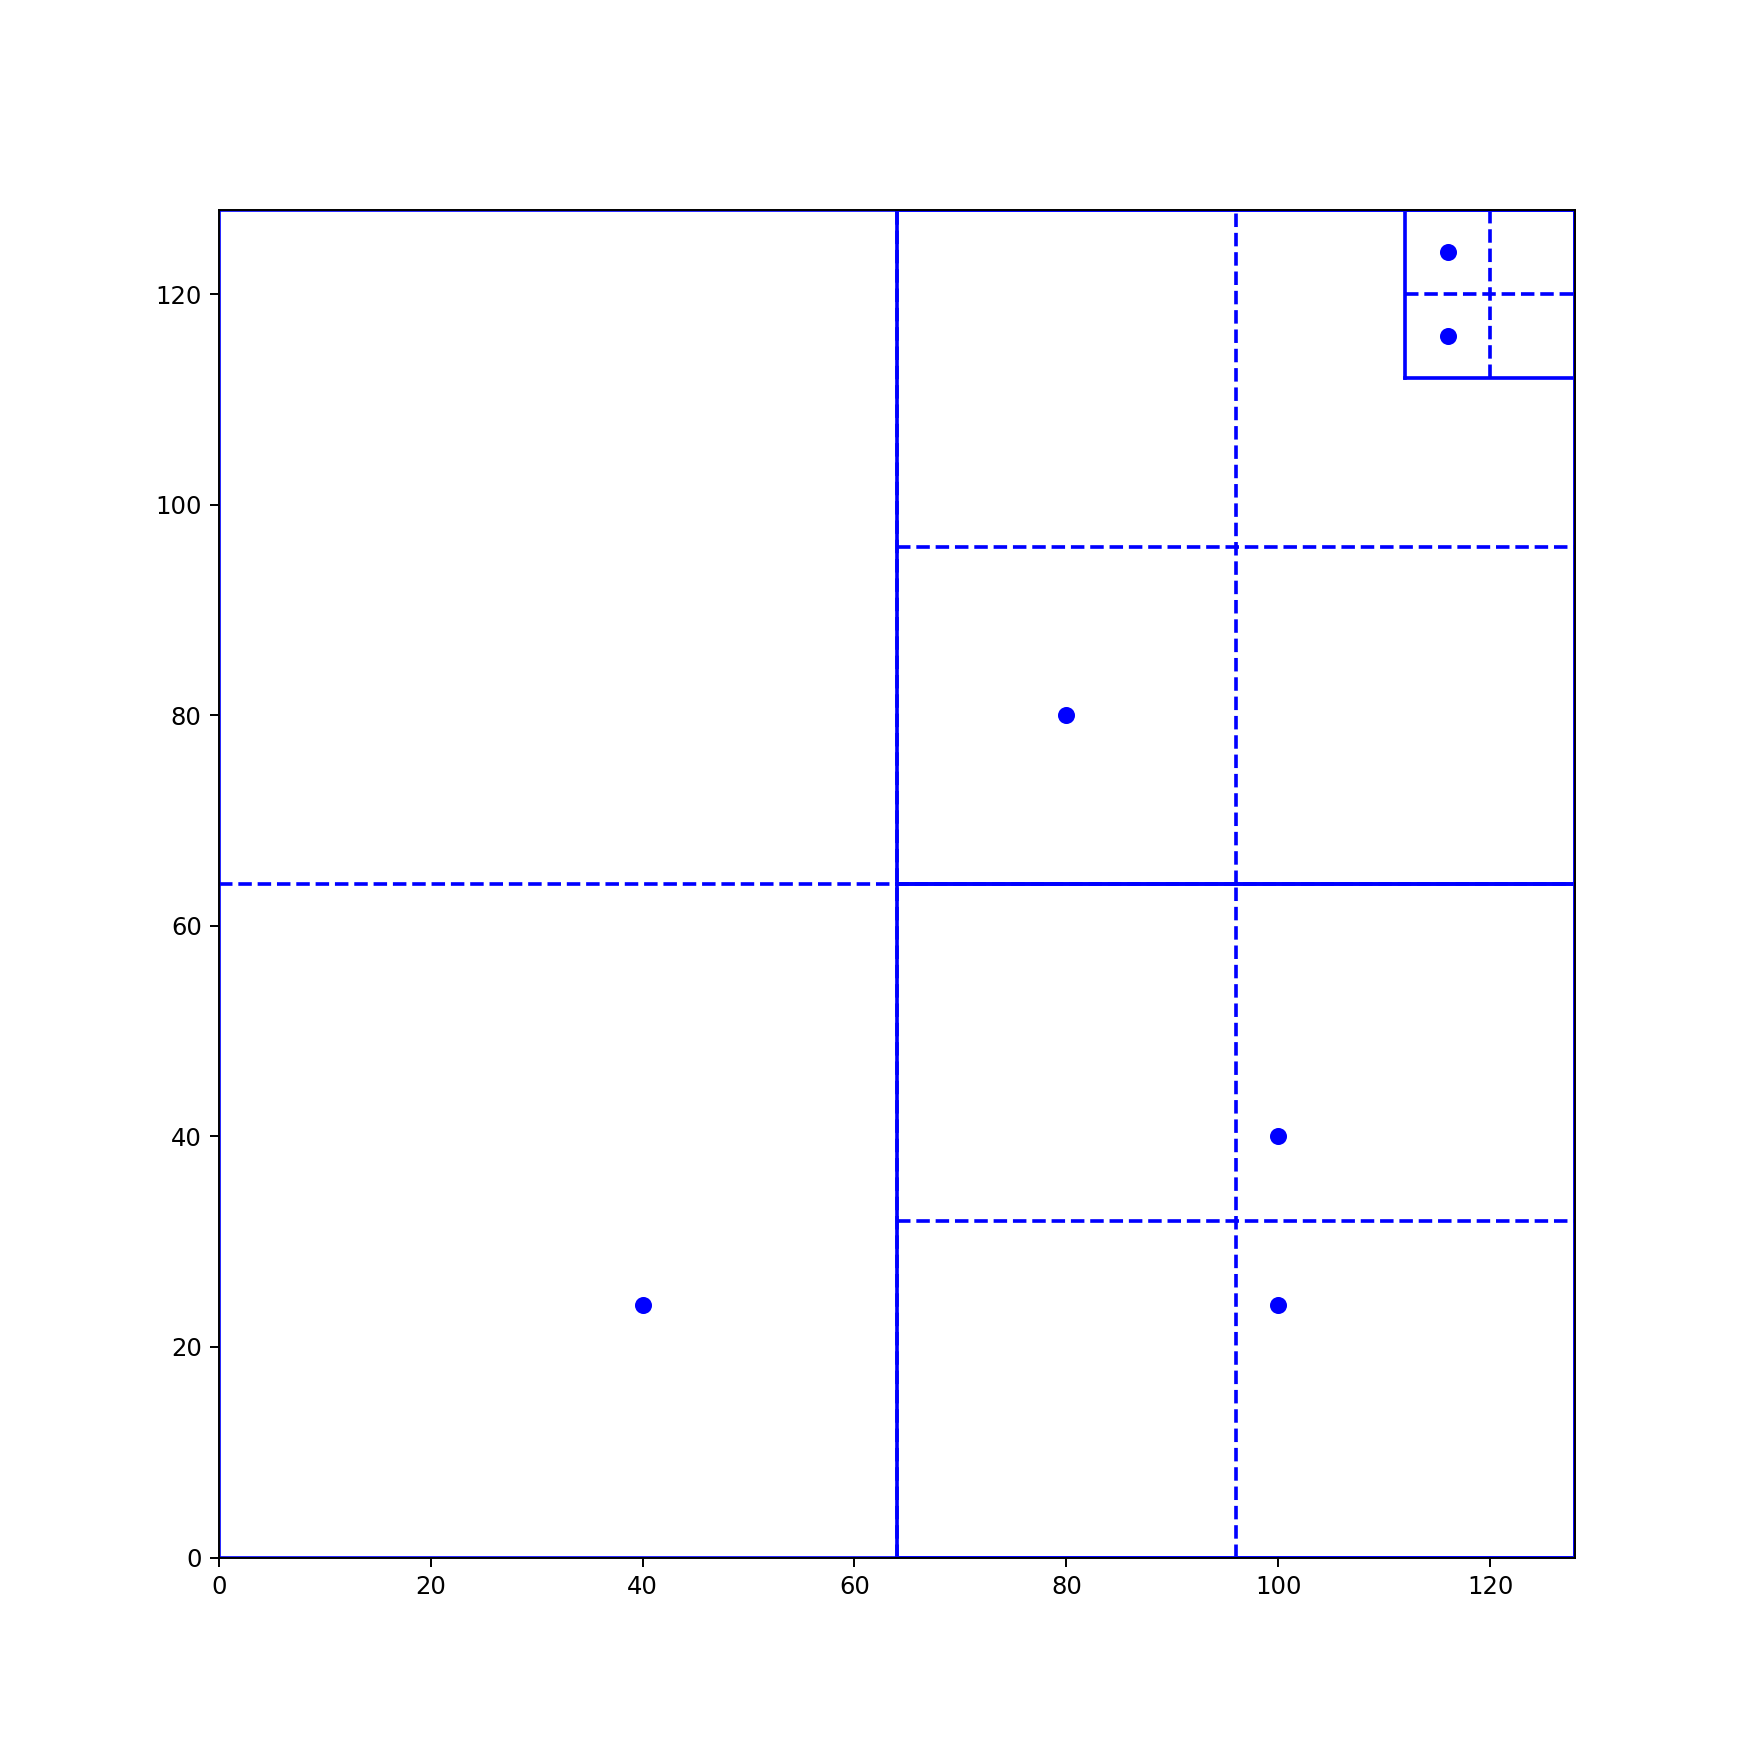

IntSlider(value=1, description='Level: ', max=3, min=1)

In [11]:
%matplotlib notebook

sqtree = SkipQTree((0, 128, 0, 128))

sqtree_test_init = [(40, 24), (80, 80), (100, 24), (100, 40), (116, 116), (116, 124)]
v.init_tree(sqtree, sqtree_test_init)
v.display_sqtree_interactive(sqtree)